In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import datetime

In [6]:
my_year = 2017
my_month = 1
my_day= 2
my_hour= 13
my_minute= 30
my_second= 15

In [7]:
my_date = datetime(my_year, my_month, my_day)

In [8]:
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [9]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute)

In [10]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 30)

In [13]:
type(my_date_time)

datetime.datetime

In [14]:
my_date_time.day

2

In [15]:
my_date_time.month

1

In [16]:
first_two = [datetime(2016,1,1,0,0), datetime(2016,1,2,0,0)]

In [17]:
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [18]:
dt_ind = pd.DatetimeIndex(first_two)

In [19]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [20]:
data = np.random.randn(2,2)

In [21]:
cols = ['a', 'b']

In [22]:
df = pd.DataFrame(data, dt_ind, cols)

In [23]:
df

,a,b
2016-01-01,1.491825,-0.020781
2016-01-02,0.688218,1.915046


In [24]:
df.index.argmax() # this is the lastest/max index number (there are 2 index 0 and 1 for this one)

1

In [25]:
df.index.max() ## this is the actual max index value

Timestamp('2016-01-02 00:00:00')

In [26]:
df.index.argmin()

0

In [27]:
df.index.min()

Timestamp('2016-01-01 00:00:00')

# TIME RESAMPLING

In [54]:
df =pd.read_csv('time_data/walmart_stock.csv')

# df =pd.read_csv('time_data/walmart_stock.csv', index_col='Date', parse_dates=True) # Faster way to make Date column datime index 

In [55]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [57]:
## FIRST WAY
df['Date'] = pd.to_datetime(df['Date'])

## SECOND WAY
df['Date'] = df['Date'].apply(pd.to_datetime)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [59]:
df.set_index('Date', inplace=True)

In [60]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [61]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [62]:
df.resample(rule='A') # resample is groupby for time series # 'A' end of year

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [66]:
## YEARS
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [67]:
# QUARTERS
df.resample(rule='Q').mean() 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [68]:
## BUSINES QUARTERS

df.resample(rule='BQ').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-30,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-29,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-28,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-29,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-28,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


In [70]:
df.resample(rule='A').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,77.599998,77.599998,76.690002,77.150002,38007300,68.568371
2013-12-31,81.209999,81.370003,80.820000,81.209999,25683700,73.929868
2014-12-31,87.080002,88.089996,86.480003,87.540001,22812400,81.707680
2015-12-31,90.800003,90.970001,89.250000,90.470001,80898100,84.914216
2016-12-31,74.500000,75.190002,73.629997,74.300003,35076700,73.233524


In [71]:
def first_day(entry):
    return entry[0]

In [73]:
df.resample('A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


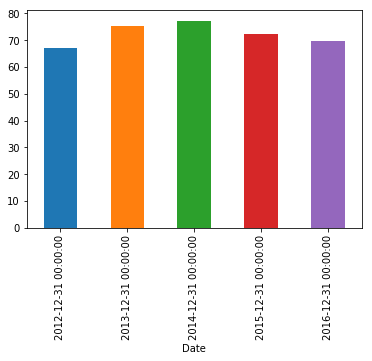

In [78]:
df['Close'].resample('A').mean().plot(kind='bar');

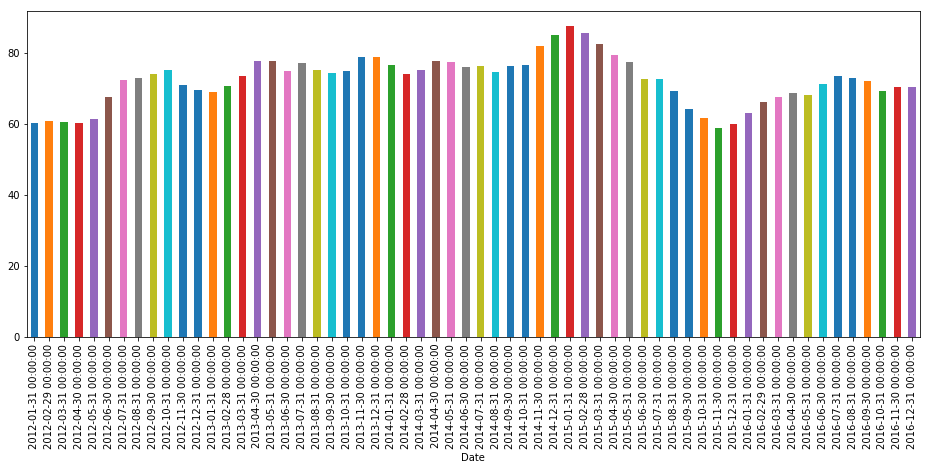

In [81]:
df['Close'].resample('M').mean().plot(kind='bar', figsize=(16,6));

# TIME SHIFTING

In [82]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [83]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [84]:
# WE are shifting 1 index forward
df.shift(periods=1).head() 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [86]:
df.shift(periods=1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


In [87]:
df.tshift(freq='M').head() # Burada index i aylik olarak shift ettik yani 1 Ocak 2 Ocak 3 Ocak vs yerine "31 Ocak" tum Ocak degerleri icin kullanlir

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [88]:
df.tshift(freq='D').head() # shift(periods=1) ile ayni

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-07,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-10,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [90]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


## ROLLING AND EXPENDING

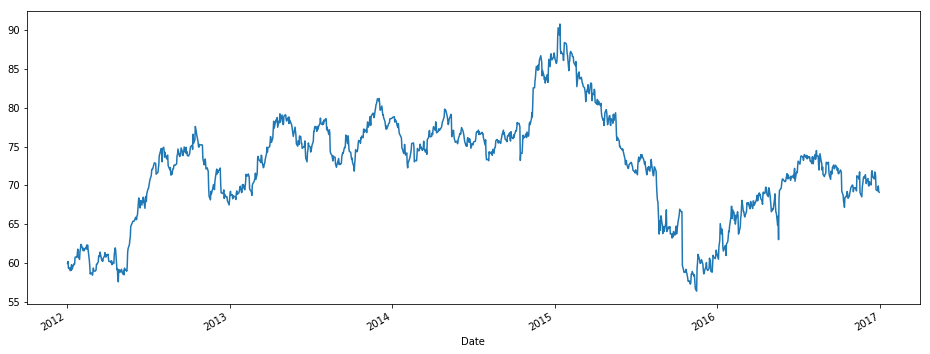

In [91]:
df['Open'].plot(figsize=(16,6));

In [94]:
df.rolling(7).mean().head(20) # first 6 rows are NaN because we used 7 days moving avarage. 7 day avarage is stated on 201-01-11
# rolling is also a kind of groupby() so think as you are getting the mean of every 7 days

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


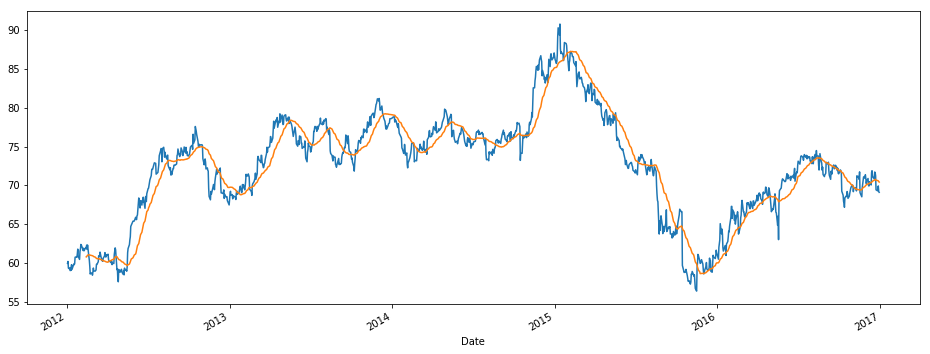

In [99]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot(figsize=(16,6));

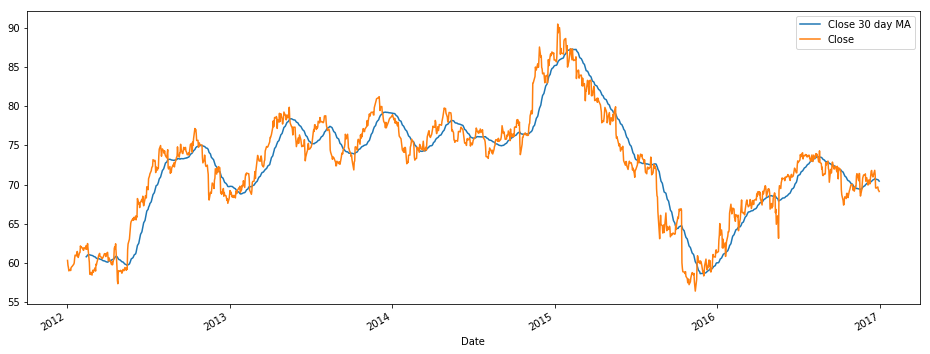

In [102]:
df['Close 30 day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 day MA', 'Close']].plot(figsize=(16,6));

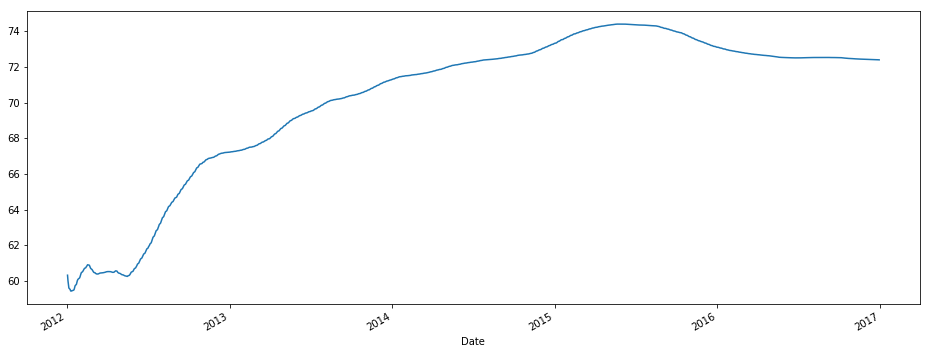

In [103]:
df['Close'].expanding().mean().plot(figsize=(16,6))
## This graph shows that each data point on it is the avarage of all the data points before

## BOLLINGER BANDS